*   Multimídia - Compressão JPEG (Exercício 1)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

In [ ]:
#Função para separar uma imagem "im" em matrizes menores de 8x8
def getBlock(im):

  #Dimensões da imagem
  n_rows, n_columns = im.shape

  #Lista para armazenamento das sub-matrizes
  im_Set = []

  #Laço para percorrer toda a imagem e construir a lista
  for i in range(0, n_rows, 8):

    for j in range(0, n_columns, 8):

      #Cada elemento da matriz será normalizado com a subtração de 128 de seu valor
      elem = im[i : i + 8, j : j + 8] - 128.0

      im_Set.append(elem)

  return im_Set

In [ ]:
#Função para realizar a junção de todas as matrizes 8x8 armazenadas em um conjunto de matrizes "im_Set", dado como parâmetro as dimensões da imagem original
def join(im_Set, im):

  #Dimensões da imagem original
  n_rows, n_columns = im.shape

  #Matriz resultante
  im_F = np.zeros([n_rows, n_columns])

  #Variável de controle para realizar iteração no conjunto de matrizes
  k = 0

  #Laço para construção da matriz final
  for i in range(0, n_rows, 8):

    for j in range(0, n_columns, 8):

      #Obtenção da matriz corrente realizando uma soma de 128 unidades em todos os elementos
      elem = im_Set[k] + 128
      
      im_F[i : i + 8, j : j + 8] = elem

      k += 1

  return im_F

In [ ]:
#Função para o cálculo da transformada discreta de cosseno de um conjunto de matrizes 8x8 "im_Set"
def dct(im_Set):

  #Lista resultante
  im_Trans = []

  #Laço para realizar o cálculo em todas as matrizes da lista
  for i in range(len(im_Set)):

    #O cálculo é realizado com arredondamento
    elem = np.round(cv2.dct(im_Set[i]))

    im_Trans.append(elem)
  
  return im_Trans

In [ ]:
#Função para o cálculo da transformada discreta de cosseno inversa de um conjunto de matrizes 8x8 "im_Set"
def idct(im_Set):

  #Lista resultante
  im_ITrans = []

  #Laço para realizar o cálculo em todas as matrizes da lista
  for i in range(len(im_Set)):

    #O cálculo é realizado com arredondamento
    elem = np.round(cv2.idct(im_Set[i]))

    im_ITrans.append(elem)
  
  return im_ITrans

In [ ]:
#Função para quantização de uma lista de matrizes "im_Set"
def quant(im_Set):
  
  #Matriz de quantização
  Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 48, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])
  
  return np.round(im_Set / Q)

In [ ]:
#Função para de-quantização de uma lista de matrizes "im_Set"
def dquant(im_Set):

  #Matriz de quantização
  Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
               [12, 12, 14, 19, 26, 48, 60, 55],
               [14, 13, 16, 24, 40, 57, 69, 56],
               [14, 17, 22, 29, 51, 87, 80, 62],
               [18, 22, 37, 56, 68, 109, 103, 77],
               [24, 35, 55, 64, 81, 104, 113, 92],
               [49, 64, 78, 87, 103, 121, 120, 101],
               [72, 92, 95, 98, 112, 100, 103, 99]])
  
  return im_Set * Q

In [ ]:
#Função para operação de zig-zag ordenado de uma matriz 8x8, resultando em um vetor
def zigZag(im):

  #Matriz de zig-zag 
  Z = [0, 1, 8, 16, 9, 2, 3, 10,
	    17, 24, 32, 25, 18, 11, 4, 5,
	    12, 19, 26, 33, 40, 48, 41, 34,
	    27, 20, 13, 6, 7, 14, 21, 28,
	    35, 42, 49, 56, 57, 50, 43, 36,
	    29, 22, 15, 23, 30, 37, 44, 51,
	    58, 59, 52, 45, 38, 31, 39, 46,
	    53, 60, 61, 54, 47, 55, 62, 63]

  #Vetor resultante
  V_Z = []

  #Laço para percorrer a matriz de zig-zag
  for i in range(64):

    #Elemento corrente da matriz de zig-zag
    elem = Z[i]

    #Cálculo da posição da matriz  
    column = elem % 8 
    row = int(elem / 8)
    
    V_Z.append(im[row, column])
    
  return V_Z

In [ ]:
#Função para converter um vetor "V" em uma matriz, de forma a realizar a operação inversa ao zig-zag ordenado
def invZigZag(V):

  #Matriz de zig-zag 
  Z = [0, 1, 8, 16, 9, 2, 3, 10,
	    17, 24, 32, 25, 18, 11, 4, 5,
	    12, 19, 26, 33, 40, 48, 41, 34,
	    27, 20, 13, 6, 7, 14, 21, 28,
	    35, 42, 49, 56, 57, 50, 43, 36,
	    29, 22, 15, 23, 30, 37, 44, 51,
	    58, 59, 52, 45, 38, 31, 39, 46,
	    53, 60, 61, 54, 47, 55, 62, 63]
  
  #Matriz resultante
  im = np.empty([8, 8])

  #Laço para percorrer a matriz de zig-zag
  for i in range(64):

    #Elemento corrente da matriz de zig-zag
    elem = Z[i]

    column = elem % 8 
    row = int(elem / 8)
    
    #Cálculo da posição da matriz  
    im[row, column] = V[i]

  return im

In [ ]:
#Função para substituir a maior sequência de zeros de um vetor "V" e substituir pelo símbolo "0", isto é, eliminar a sequência redundante de zeros
def delZero(V):

  #Contagem do índice do vetor
  count = len(V) - 1

  #Variável de controle
  flag = 0

  #O vetor é analisado de trás para frente e a análise é finalizada assim que um valor distinto de zero for encontrado
  while flag == 0:

    if V[count] == 0:

      count -= 1

      if count <= 0:

        return [V[0]]
  
    else:

      flag += 1
      
  #Retornar o vetor sem a sequência final de zeros, devido a sua redundância
  return V[0 : count + 2] 

In [ ]:
#Função para complementar um vetor "V" com valores 0
def includeZero(V):

  #O vetor é incrementado até possuir 64 elementos
  while len(V) < 64:

    V.append(0)
      
  return V 

In [ ]:
#Função para converter um vetor "V" de valores inteiros em símbolos 
def int2simb(V):

  #Lista para armazenamento dos novos símbolos
  V_Simb = []

  #Laço para percorrer todo o vetor e realizar as substituições
  for i in range(len(V)):

    #Elemento normalizado para não assumir valores negativos
    elem = int(V[i] + 70)
    
    #COnversão de inteiro para caractere de acordo com a tabela ASCII
    V_Simb.append(chr(elem))

  return V_Simb

In [ ]:
#Função para converter um vetor "V" de símbolos em valores inteiros
def simb2int(V):

  #Lista para armazenamento dos novos valores inteiros
  V_Int = []

  for i in range(len(V)):

    #Obtenção do valor do elemento corrente
    elem = ord(V[i]) - 70

    V_Int.append(elem)

  return V_Int

In [ ]:
#Função para ordenação de um vetor de símbolos "alf" em ordem decrescente de acordo com suas frequências "freq"
def order(alf, freq):

  #Listas que serão armazenados os resultados referentes a "V" em ordem decrescente
  alf_ord = []
  freq_ord = []

  for i in range(len(alf)):

    #Índice do elemento de máxima frequência
    max = np.argmax(freq)

    #Obtenção do elemento do alfabeto de maior frequência para ser inserido no vetor de alfabeto ordenado
    alf_ord.append(alf[max])
    
    #Obtenção da maior frequência para ser inserido no vetor de frequência ordenada
    freq_ord.append(freq[max])

    #Eliminação do elemento já analisado
    freq[max] = -1

  return alf_ord, freq_ord

In [ ]:
#Função para o cálculo da tabela de códigos de acordo com o algoritmo de Huffman 
def huffman(alf_abs, alf_var, freq, cod):

  #Ordenação do alfabeto corrente e do vetor de frequências em ordem decrescente
  alf_var, freq = order(alf_var, freq)

  #Obtenção das dimensões dos vetores ordenados
  n_simb = len(alf_var)
  n_freq = len(freq)

  #Laço para análise do elemento de menor frequência do vetor do alfabeto corrente
  for i in range(len(alf_var[n_simb - 1])):
    
    #Obtenção do elemento corrente, presente no vetor "alf_var"
    elem = alf_var[n_simb - 1][i]

    #Obtenção da posição do elemento corrente no vetor "alf_abs"
    pos = alf_abs.index(elem)

    #Incrementação do código do elemento corrente, presente no vetor "cod", na posição espeficicada anteriormente 
    cod[pos] = '1' + cod[pos]
  
  #Laço para análise do segundo elemento de menor frequência do vetor do alfabeto corrente
  for i in range(len(alf_var[n_simb - 2])):
    
    #Obtenção do elemento corrente, presente no vetor "alf_var"
    elem = alf_var[n_simb - 2][i]

    #Obtenção da posição do elemento corrente no vetor "alf_abs"
    pos = alf_abs.index(elem)

    #Incrementação do código do elemento corrente, presente no vetor "cod", na posição espeficicada anteriormente 
    cod[pos] = '0' + cod[pos]

  #Se o vetor "alf_var" possuir mais de dois elementos, o algoritmo faz modificações em "alf_var" e "freq" e prossegue na execução do algoritmo
  if n_simb > 2:
  
    #Junção das duas menores frequências e atribuição na penúltima posição de "freq"
    freq[n_freq - 2] = freq[n_freq - 2] + freq[n_freq - 1]

    #Claramente, como atribuímos as duas útimas frequências na penúltima posição, devemos deletar a última posição
    freq = np.delete(freq, n_freq - 1)

    #Assim como no vetor "freq", devemos unir os dois últimos caracteres do vetor "alf_var", formando um novo símbolo para o alfabeto modificado
    alf_var[n_simb - 2] = alf_var[n_simb - 2] + alf_var[n_simb - 1]

    #E, novamente, deletar a última posição
    alf_var = np.delete(alf_var, n_simb - 1)

    #Recursão do algoritmo com os vetores "alf_var" e "freq" modificados e "alf_abs" e "cod" não modificados
    huffman(alf_abs, alf_var, freq, cod)

In [ ]:
#Função para codificação de um conjunto de dados "string", dado sua lista de códigos "cod" e seu alfabeto "alf"
def getCode(string, alf, cod):

  #String para armazenamento do resultado
  cod_string = ""

  for i in range(len(string)):

    #Obtenção do elemento corrente da string
    elem = string[i]
    
    #Obtenção da posição do elemento corrente no alfabeto
    pos = alf.index(elem)

    #Obtenção do código correspondente ao elemento corrente e junção do mesmo à codificação final
    cod_string += cod[pos]

  return cod_string

In [ ]:
#Função que recebe um conjunto de vetores "V_Set" e obtem as variáveis necessárias para a codificação de huffman, retornando a tabela de códigos, a tabela do alfabeto e o código final de cada vetor
def encoder(V_Set):

  #Listas para armazenamento dos resultados
  V_Alf = []
  V_Cod = []
  V_Final = []

  for i in range(len(V_Set)):

    #Obtenção das frequências e alfabeto do vetor "V"
    alf, freq = np.unique(V_Set[i], return_counts = True)

    #Conversão em listas
    alf = list(alf)
    freq = list(freq)

    #Variável para tabela de códigos
    cod = [""] * len(alf)

    #Codificação de Huffman
    huffman(alf, alf, freq, cod)

    #Obtenção da codificação final
    final = getCode(V_Set[i], alf, cod)

    V_Alf.append(alf)
    V_Cod.append(cod)
    V_Final.append(final)

  return V_Alf, V_Cod, V_Final

In [ ]:
#Função para decodificar um sequência de bits "seq", de acordo com uma tabela de códigos "cod" e um alfabeto "alf" que foi codificada pelo algoritmo de Huffman
def huffmanDecode(alf, cod, seq):

  #Variável para armazenamento do resultado
  decode = []

  #Variável para buffer
  buffer = ""

  #Laço para percorrer toda a sequência de bits
  for i in range(len(seq)):

    #Captura o bit corrente e verifica se está contido na tabela de códigos
    #Se não estiver, captura o próximo bit e anexa ao variável buffer
    buffer += seq[i]

    #Se estiver, trata o código detectado pelo buffer
    if buffer in cod:

      #Obtenção da posição do código detectado
      pos = cod.index(buffer)

      #Obtenção do símbolo do alfabeto na posição do código detectado
      elem = alf[pos]

      #Anexa o símbolo obtido ao resultado final
      decode.append(elem)

      #Limpa o buffer
      buffer = ""

  return decode

In [ ]:
#Função para realizar o cálculo do Mean Square Error (MSE) entre duas imagens "im_1" e "im_2"
def mse(im_1, im_2):

  mse = np.sum((im_1.astype("float") - im_2.astype("float")) ** 2)
  
  mse /= float(im_1.shape[0] * im_1.shape[1])

  return mse

In [ ]:
#Função para realizar o cálculo do Signal Noise Ratio (SNR) entre duas imagens "im_1" e "im_2"
def snr(im_1, im_2):

  sse = np.sum((im_1 - im_2) ** 2)

  snr = np.log10(sse / mse(im_1, im_2))

  return 10 * snr

In [ ]:
#Função para realizar o cálculo do Peak Signal Noise Ratio (PSNR) entre duas imagens "im_1" e "im_2"
def psnr(im_1, im_2):

  arg = (np.max(im_1)) ** 2

  psnr = np.log10(arg / mse(im_1, im_2))

  return 10 * psnr

In [ ]:
#Declaração das bibliotecas necessárias, definição do diretório raíz e montagem do diretório
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Colab Notebooks/dados/'

Mounted at /content/gdrive


Definida a série de funções acima, será selecionada 1 imagem cinza para:

Comprimir a imagem;

Descomprimir a imagem;

Analisar o erro entre a imagem inicial (anterior à compressão) e final (posterior ao processo de descompressão).

Imagem original:


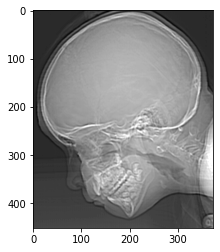

In [ ]:
#Etapa de compressão: Aquisição da imagem

#Obtenção da imagem original
im_Inicial = cv2.imread(root_path + 'ctskull.tif', cv2.IMREAD_GRAYSCALE)

#Exibir imagem original
print("Imagem original:")
plt.imshow(im_Inicial, 'gray')

In [ ]:
#Etapa de compressão: Separação da imagem em blocos 8x8

#Obtenção das dimensões da imagem
n_rows, n_columns = im_Inicial.shape

#Cortar imagem para que suas dimensões sejam múltiplas de 8, para facilitar o processo de divisão da imagem em blocos de 8x8
#Nesse caso, a imagem pode perder alguns pixels
im_Inicial = im_Inicial[0 : (n_rows - n_rows % 8), 0 : (n_columns - n_columns % 8)]

#Separação da imagem em um grupo de matrizes 8x8
im_Set = getBlock(im_Inicial)

#Exemplo: exibir matriz qualquer da lista resultante 
#A imagem agora se encontra separada, com suas partes dentro de uma lista, onde cada elemento é uma matriz 8x8
print("Matriz número 501 após o processo de separação:")
print(im_Set[500])

Matriz número 501 após o processo de separação:
[[ 4.  9. 15. 24. 31. 32. 28. 25.]
 [ 4.  6.  8. 13. 19. 31. 32. 27.]
 [ 8.  9.  9.  9. 13. 24. 31. 31.]
 [16. 13. 13. 12.  9. 15. 25. 32.]
 [27. 15. 15. 15. 12.  9. 16. 25.]
 [37. 19. 13. 13. 13. 12. 13. 22.]
 [46. 28. 15.  8.  9. 12. 13. 18.]
 [47. 43. 22.  6.  3.  8. 13. 18.]]


In [ ]:
#Etapa de compressão: Transformação discreta de cosseno

#Cálculo da transformada discreta de cosseno de cada matriz 8x8
im_Trans = dct(im_Set)

#Exemplo: exibir matriz qualquer da lista de matrizes após transformação
#A imagem agora é uma lista, onde cada elemento é uma matriz 8x8 resultante do cálculo de transformação da lista anterior 
print("Matriz número 501 após o processo de transformação:")
print(im_Trans[500])

Matriz número 501 após o processo de transformação:
[[145.  -9.  33.   6.   4.   2.   2.  -1.]
 [ -1. -59. -34.  -2.  -7.   2.  -1.  -1.]
 [ 11.   9.  -5.   8.  -8.  -5.  -2.  -1.]
 [  3.   4. -13.   4.  12.   1.   2.   1.]
 [  4.   7.  -2.  -9.   0.  -2.  -2.   0.]
 [  2.  -1.  -0.   1.   1.   0.   1.   0.]
 [  2.   0.  -1.  -2.   0.  -2.  -1.   0.]
 [ -0.   2.  -1.   1.   1.   0.  -0.   1.]]


In [ ]:
#Etapa de compressão: Quantização

#Quantização da imagem
im_Quant = quant(im_Trans)

#Exemplo: exibir matriz qualquer da lista de matrizes após quantização
#A imagem agora está quantizada 
print("Matriz número 501 após o processo de quantização:")
print(im_Quant[500])

Matriz número 501 após o processo de quantização:
[[ 9. -1.  3.  0.  0.  0.  0. -0.]
 [-0. -5. -2. -0. -0.  0. -0. -0.]
 [ 1.  1. -0.  0. -0. -0. -0. -0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0. -0. -0.  0. -0. -0.  0.]
 [ 0. -0. -0.  0.  0.  0.  0.  0.]
 [ 0.  0. -0. -0.  0. -0. -0.  0.]
 [-0.  0. -0.  0.  0.  0. -0.  0.]]


In [ ]:
#Etapa de compressão: Operação de Zig-Zag Ordenado

#Lista para armazenamento dos vetores resultantes (cada matriz será convertida em vetor)
im_Z = []

#Realizar a operação em todas as matrizes
for i in range(len(im_Quant)):

  im_Z.append(zigZag(im_Quant[i]))

#Exemplo: exibir vetor qualquer da lista de vetores após operação de zig-zag
#A imagem, após o processo de zig-zag, passou de uma lista de matrizes para uma lista de vetores 
print("Vetor número 501 após o processo de zig-zag ordenado:")
print(im_Z[500])

Vetor número 501 após o processo de zig-zag ordenado:
[9.0, -1.0, -0.0, 1.0, -5.0, 3.0, 0.0, -2.0, 1.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0]


In [ ]:
#Etapa de compressão: Eliminação da maior sequência de zeros (similar ao RLE)

#Lista para armazenamento dos vetores resultantes
im_RLE = []

#Realizar a operação em todos os vetores
for i in range(len(im_Z)):

  im_RLE.append(delZero(im_Z[i]))

#Exemplo: exibir vetor qualquer da lista após operação de eliminação de zeros redundantes
#A imagem, após o processo, reduziu o tamanho de seus vetores de maneira significativa (inclusive, para vetores somente com valores 0, reduziu seu tamanho de 64 para 1)
print("Vetor número 501 do canal Y após o processo de eliminação de sequência de zeros:")
print(im_RLE[500])

Vetor número 501 do canal Y após o processo de eliminação de sequência de zeros:
[9.0, -1.0, -0.0, 1.0, -5.0, 3.0, 0.0, -2.0, 1.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -1.0, 0.0]


In [ ]:
#Etapa de compressão: Conversão dos valores inteiros dos vetores para símbolos (preparação para a codificação de Huffman)

#Lista para armazenamento dos vetores resultantes
im_Simb = []

#Realizar a operação em todos os vetores
for i in range(len(im_RLE)):

  im_Simb.append(int2simb(im_RLE[i]))

#Exemplo: exibir vetor qualquer da lista após operação de conversão para símbolos
#A imagem, após o processo, agora possui símbolos equivalentes aos seus valores anteriores
print("Vetor número 501 após o processo de conversão inteiro - caractere:")
print(im_Simb[500])

Vetor número 501 após o processo de conversão inteiro - caractere:
['O', 'E', 'F', 'G', 'A', 'I', 'F', 'D', 'G', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'E', 'F']


In [ ]:
#Etapa de compressão: Codificação de Huffman

#Listas para armazenamento dos valores necessários para decodificação posterior: lista de códigos, lista de símbolos e codificação resultante
im_Alf = []
im_Cod = []
im_Final = []

#Realizar a operação em todos os vetores de símbolos
im_Alf, im_Cod, im_Final = encoder(im_Simb)

#Exemplo: exibir o alfabeto, tabela de códigos e codificação final de um vetor qualquer da lista após operação de codificação
#O processo chegou à etapa final, e a imagem, após o processo, agora possui três listas: uma para alfabeto, uma para tabela de códigos e uma para codificação final da cadeia de caracteres resutante da etapa anterior
#Estas listas possuem os alfabetos, tabelas e codificação final de todos os vetores
print("Alfabeto número 501 do canal Y:")
print(im_Alf[500])
print("\nTabela de códigos número 501 do canal Y:")
print(im_Cod[500])
print("\nCodificação final número 501 do canal Y:")
print(im_Final[500])

Alfabeto número 501 do canal Y:
['A', 'D', 'E', 'F', 'G', 'I', 'O']

Tabela de códigos número 501 do canal Y:
['1010', '1011', '110', '0', '111', '1000', '1001']

Codificação final número 501 do canal Y:
1001110011110101000010111110000000001100


Com a obtenção das listas finais (alfabeto, códigos, codificação) da imagem, agora será realizada a etapa de descompressão até retornar a imagem original. Além disso, ao fim do processo, serão calculadas métricas de erros para avaliar as mudanças ocorridas na imagem ao longo de todos os processos.

In [ ]:
#Etapa de descompressão: Decodificação de Huffman

#Lista para armazenamento dos vetores resultantes
im_Decode = []

#Realizar a operação em todos os vetores
for i in range(len(im_Alf)):

  im_Decode.append(huffmanDecode(im_Alf[i], im_Cod[i], im_Final[i]))

#Exemplo: exibir vetor qualquer da lista após operação de decodificação
#A imagem, após o processo, agora possui uma lista de strings (sequência de caracteres)
#Essa sequência é idêntica àquela obtida no processo de compressão (etapa de conversão inteiro - caractere)
#Isso é devido ao fato de que essa etapa se refere a compressão sem perda
print("Vetor número 501 após o processo de decodificação:")
print(im_Decode[500])

Vetor número 501 após o processo de decodificação:
['O', 'E', 'F', 'G', 'A', 'I', 'F', 'D', 'G', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'E', 'F']


In [ ]:
#Etapa de descompressão: Conversão caracter - inteiro

#Lista para armazenamento dos vetores resultantes
im_Int = []

#Realizar a operação em todos os vetores
for i in range(len(im_Decode)):

  im_Int.append(simb2int(im_Decode[i]))

#Exemplo: exibir vetor qualquer da lista após operação de conversão
#A imagem, após o processo, agora possui uma lista de vetores de inteiros
#Essa sequência é idêntica àquela obtida no processo de compressão (etapa de eliminação de zeros)
#Isso é devido ao fato de que essa etapa se refere a compressão sem perda
print("Vetor número 501 após o processo de conversão caractere - inteiro:")
print(im_Int[500])

Vetor número 501 após o processo de conversão caractere - inteiro:
[9, -1, 0, 1, -5, 3, 0, -2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]


In [ ]:
#Etapa de descompressão: Complemento dos zeros redundantes

#Lista para armazenamento dos vetores resultantes
im_Zeros = []

#Realizar a operação em todos os vetores
for i in range(len(im_Int)):

  im_Zeros.append(includeZero(im_Int[i]))

#Exemplo: exibir vetor qualquer da lista após operação de complemento
#A imagem, após o processo, agora possui uma lista vetores de inteiros com todos os 64 valores (adição dos 0's eliminados no processo de compressão)
#Essa sequência é idêntica àquela obtida no processo de compressão (etapa de zig-zag ordenado)
#Isso é devido ao fato de que essa etapa se refere a compressão sem perda
print("Vetor número 501 após o processo de complemento:")
print(im_Zeros[500])

Vetor número 501 após o processo de complemento:
[9, -1, 0, 1, -5, 3, 0, -2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#Etapa de descompressão: Operação inversa ao zig-zag ordenado

#Lista para armazenamento das matrizes resultantes
im_Mat = []

#Realizar a operação em todos os vetores
for i in range(len(im_Zeros)):

  im_Mat.append(invZigZag(im_Zeros[i]))

#Exemplo: exibir matriz qualquer da lista após operação de zig-zag inverso
#A imagem, após o processo, agora possui uma lista matrizes 8x8
#Devido ao fato de que esse processo é sem perdas, notamos que as matrizes dessa etapa e da etapa de compressão ainda são idênticas
print("Matriz número 501 após o processo de zig-zag inverso:")
print(im_Mat[500])

Matriz número 501 após o processo de zig-zag inverso:
[[ 9. -1.  3.  0.  0.  0.  0.  0.]
 [ 0. -5. -2.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [ ]:
#Etapa de descompressão: De-quantização

#Realizar a operação em todas as matrizes dos canais da imagem
im_Dquant = dquant(im_Mat)

#Exemplo: exibir matriz qualquer da lista após operação de de-quantização
#A partir desse momento, perceberemos as diferenças em relação ao processo equivalente na etapa de compressão (as perdas começam a partir dessa etapa)
print("Matriz número 501 após o processo de de-quantização:")
print(im_Dquant[500])

Matriz número 501 após o processo de de-quantização:
[[144. -11.  30.   0.   0.   0.   0.   0.]
 [  0. -60. -28.   0.   0.   0.   0.   0.]
 [ 14.  13.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -22.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


In [ ]:
#Etapa de descompressão: Transformação discreta de cosseno inversa

#Realizar a operação em todas as matrizes da imagem
im_ITrans = ict(im_Dquant)

#Exemplo: exibir matriz qualquer da lista após operação de transformação inversa
print("Matriz número 501 após o processo de transformação inversa:")
print(im_ITrans[500])

Matriz número 501 após o processo de transformação inversa:
[[ 1.  7. 15. 23. 29. 30. 29. 28.]
 [ 7.  8. 11. 16. 21. 26. 30. 32.]
 [12. 10.  8.  9. 13. 21. 29. 35.]
 [14. 12.  9.  8. 11. 17. 25. 30.]
 [17. 15. 13. 12. 13. 15. 19. 21.]
 [26. 23. 18. 15. 13. 13. 14. 16.]
 [40. 33. 22. 12.  7.  9. 13. 17.]
 [51. 40. 23.  8.  2.  5. 14. 20.]]


Imagem final:


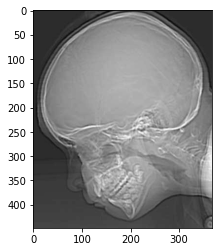

In [ ]:
#Etapa de descompressão: Junção das sub-imagens

#Realizar a operação em todas as matrizes da imagem
#A junção ocorre tendo como parâmetro as dimensões das imagens anterior ao processo de separação em blocos, para que a imagem retorne ao tamanho original
im_Final = join(im_ITrans, im_Inicial)

#Nesse momento, a imagem se encontra em seu estado final
print("Imagem final:")
plt.imshow(im_Final, 'gray')

Imagem inicial:


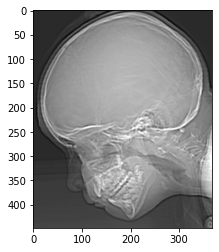

In [ ]:
#Somente para efeitos de comparação, será exibida a imagem original
print("Imagem inicial:")
plt.imshow(im_Inicial, 'gray')

In [ ]:
#Cálculo das métricas Mean Square Error (MSE), Signal Noise Ratio (SNR) e Peak Signal Noise Ratio (PSNR) entre as imagens inicial e final

print("Mean Square Error (MSE):", mse(im_Inicial, im_Final))
print("Signal Noise Ratio (SNR):", snr(im_Inicial, im_Final))
print("Peak Signal Noise Ratio (PSNR):", psnr(im_Inicial, im_Final))

Mean Square Error (MSE): 5.415675951086956
Signal Noise Ratio (SNR): 52.17125832671662
Peak Signal Noise Ratio (PSNR): 40.794276905795066


Notamos que a imagem resultante é muito semelhante a original, pois as perdas do processo foram muito baixas. É possível notar que a imagem ficou mais escura, omitindo alguns detalhes que haviam na foto original.